In [ ]:
#!pip install -q -U google-generativeai

In [ ]:
import google.generativeai as genai
import pathlib
import textwrap
from IPython.display import display
from IPython.display import Markdown

In [ ]:
def tes_mark(text):
  text=text.replace('*',' *')
  return Markdown(textwrap.indent(text,'> ',predicate=lambda _:True))


In [ ]:
from google.colab import userdata


In [ ]:
key=userdata.get('GEMINI_API_KEY')

In [ ]:
genai.configure(api_key=key)

In [ ]:
for models in genai.list_models():
  print(models)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko

In [ ]:
for models in genai.list_models():
  if 'generateContent' in models.supported_generation_methods:
    print(models.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/learnlm-1.5-pro-experimental
models/gemini-exp-1114
models/gemini-exp-1121


In [ ]:
!curl -o image.jpg https://hbkonline.in/pub/media/catalog/product/a/p/apple_fruit_powder3.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  629k  100  629k    0     0   307k      0  0:00:02  0:00:02 --:--:--  307k


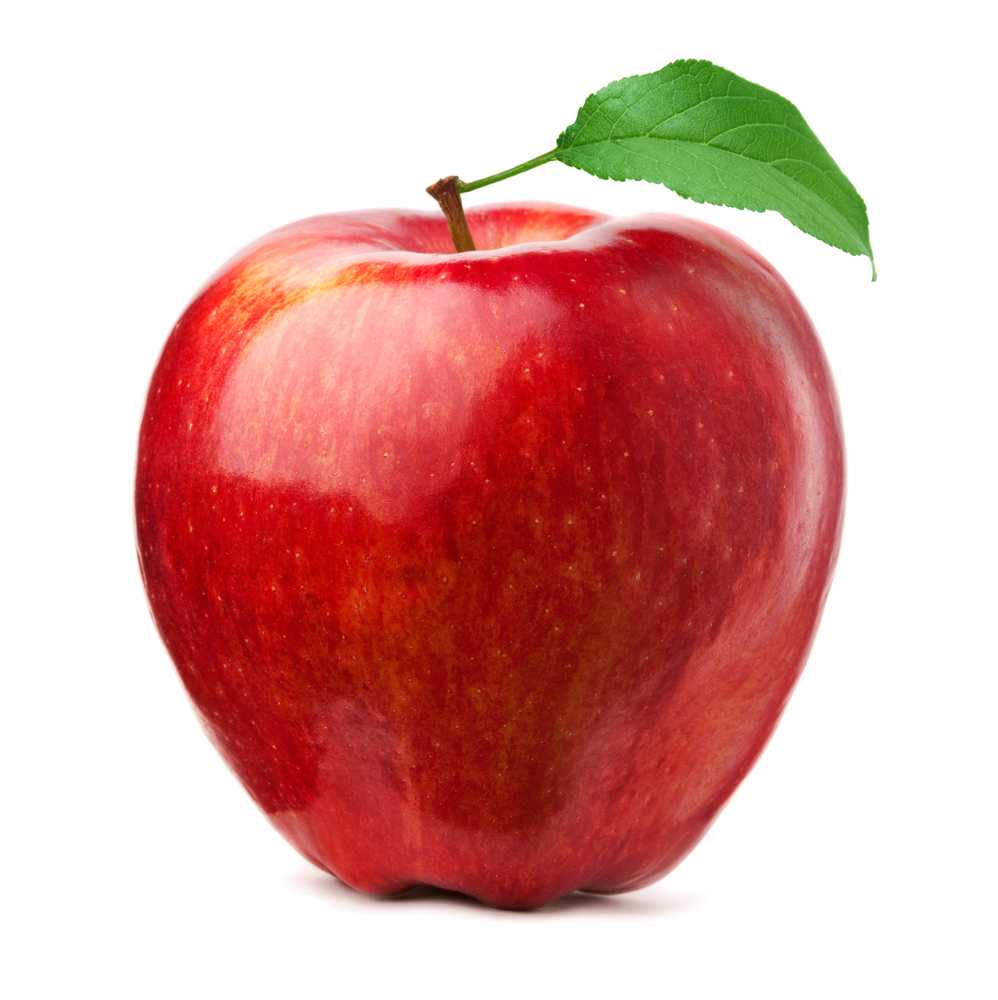

In [ ]:
import PIL.Image
img=PIL.Image.open('image.jpg')
img

In [ ]:
!curl -o img2.jpg https://chillehut.com/wp-content/uploads/2013/06/chbiryani.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  187k  100  187k    0     0   112k      0  0:00:01  0:00:01 --:--:--  112k


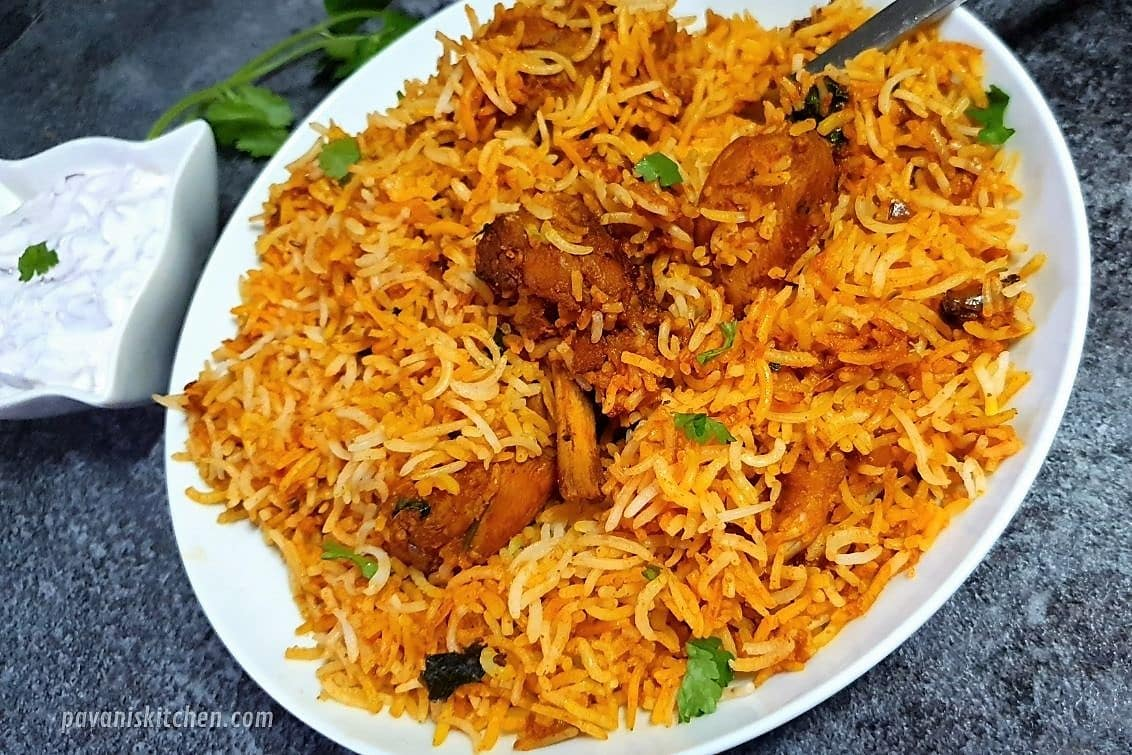

In [ ]:
img1=PIL.Image.open('img2.jpg')
img1

In [ ]:
img_model=genai.GenerativeModel('gemini-1.5-flash')


In [ ]:
def generate(image_url,prompt):
  image = httpx.get(image_url)
  response = img_model.generate_content([{'mime_type':'image/jpeg', 'data': base64.b64encode(image.content).decode('utf-8')}, prompt])
  return tes_mark(response.text)

In [ ]:
prom="describe the cooking of the dish in image"
imag_url='https://chillehut.com/wp-content/uploads/2013/06/chbiryani.jpg'
generate(imag_url,prom)

> That's Chicken Biryani, a popular South Asian dish.  While the exact recipe isn't visible, the image shows the final result of a cooking process that likely involved these steps:
> 
> 1.  * *Marination: * * Chicken pieces were likely marinated in a mixture of yogurt, spices (turmeric, chili powder, garam masala, ginger-garlic paste are common), and perhaps some onions and lemon juice. This step tenderizes the chicken and infuses it with flavor.
> 
> 2.  * *Sautéing Aromatics: * * Onions, garlic, ginger, and possibly green chilies would be sautéed in oil or ghee (clarified butter) until softened.  This forms the base of the flavor.
> 
> 3.  * *Cooking the Chicken: * * The marinated chicken would be added to the sautéed aromatics and cooked until browned.
> 
> 4.  * *Rice Preparation: * * Basmati rice is typically used for biryani. It would be rinsed and parboiled (partially cooked) separately.
> 
> 5.  * *Layering (often): * *  A traditional method involves layering the cooked chicken and rice in a pot or pan.  Spices, fried onions, and herbs might be layered in between.
> 
> 6.  * *Steaming/Simmering: * *  The layered pot is then covered and either steamed or simmered on low heat for a period of time, allowing the flavors to meld and the rice to cook fully. This creates a fragrant and moist dish.
> 
> 7.  * *Garnish: * * Finally, the biryani is garnished with fresh cilantro (coriander) before serving.  It's often served with raita (a yogurt-based condiment), as seen in the image.
> 
> 
> The picture displays a finished Chicken Biryani, demonstrating the rich color and texture achieved through these steps.  The appearance suggests a well-cooked, aromatic, and flavorful dish.


In [ ]:
import gradio as gr

In [ ]:
#!pip install gradio

In [ ]:
demo=gr.Interface(fn=generate,inputs=[gr.Textbox(label="Image URL"),gr.Textbox(label="text")],outputs='text')

In [ ]:
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://04c309b76780bd0279.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
generate('https://healux.in/wp-content/uploads/2020/11/ChickenBiryani.jpg','what is the dish')

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2019, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1566, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 8

ReadTimeout: HTTPConnectionPool(host='localhost', port=36597): Read timed out. (read timeout=600.0)